# 075.실습 - Titanic 호 data 를 이용한 Feature Engineering 과 Modeling

Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  $\rightarrow$ 객실 등급  
survival -  Survival (0 = No; 1 = Yes)  $\rightarrow$ 생존여부  
name - Name  
sex - Sex  
age - Age  
sibsp - Number of Siblings/Spouses Aboard  $\rightarrow$ 함께 탑승한 형제 또는 배우자 수   
parch - Number of Parents/Children Aboard  $\rightarrow$ 함께 탑승한 부모 또는 자녀 수  
ticket - Ticket Number  
fare - Passenger Fare (British pound)  
cabin - Cabin  $\rightarrow$ 선실번호  
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  $\rightarrow$ 탑승한 항구

In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [47]:
df_titanic = pd.read_csv("datasets/titanic.csv")

In [48]:
df_titanic.shape

(891, 12)

In [49]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df_titanic.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [51]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [52]:
df_titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [53]:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## outlier 검출

- outlier 가 prediction(특히 regression) 에 영향을 큰 영향을 줄 수 있으므로, 연속값으로 구성된 column 의 outlier 검출

- outlier 의 정의는 일반적으로 IQR(Inter-quartile range, Q3 - Q1) * 1.5 보다 큰 경우로 한다.

-  세개 이상의 outlier 값을 가진 row 를 drop 시킨다.

In [54]:
THRESHOLD_OUTLIER = 3
outlier_indices = []

for col in ['Age', 'SibSp', 'Parch', 'Fare']:
    Q1 = np.percentile(df_titanic[col], 25)
    Q3 = np.percentile(df_titanic[col], 75)
    IQR = Q3 - Q1   
    outlier_step = IQR * 1.5
    outlier_list = df_titanic[(df_titanic[col] < Q1 - outlier_step) | 
                                       (df_titanic[col] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list)

In [55]:
len(outlier_indices)

375

In [56]:
outlier_indices[:10]

[7, 16, 24, 27, 50, 59, 63, 68, 71, 85]

In [57]:
from collections import Counter

multiple_outliers = list(k for k, v in Counter(outlier_indices).items() if v >= THRESHOLD_OUTLIER)
multiple_outliers

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [58]:
df_titanic.iloc[multiple_outliers]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,0,1,male,19.0,3,2,263.00,S
88,1,1,female,23.0,3,2,263.00,S
159,0,3,male,NaN,8,2,69.55,S
180,0,3,female,NaN,8,2,69.55,S
201,0,3,male,NaN,8,2,69.55,S
324,0,3,male,NaN,8,2,69.55,S
341,1,1,female,24.0,3,2,263.00,S
792,0,3,female,NaN,8,2,69.55,S
846,0,3,male,NaN,8,2,69.55,S
863,0,3,female,NaN,8,2,69.55,S


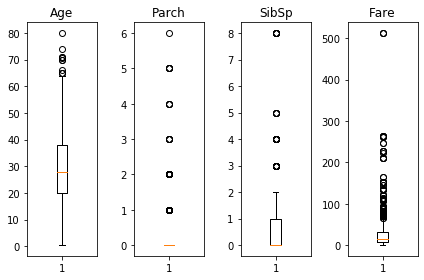

In [59]:
plt.subplot(141)
plt.boxplot(df_titanic[df_titanic['Age'] > 0]['Age'])
plt.title('Age')
plt.subplot(142)
plt.boxplot(df_titanic['Parch'])
plt.title('Parch')
plt.subplot(143)
plt.boxplot(df_titanic['SibSp'])
plt.title('SibSp')
plt.subplot(144)
plt.boxplot(df_titanic['Fare'])
plt.title('Fare')
plt.tight_layout()

In [60]:
df_titanic = df_titanic.drop(multiple_outliers).reset_index(drop=True)

In [61]:
df_titanic.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
876,0,2,male,27.0,0,0,13.00,S
877,1,1,female,19.0,0,0,30.00,S
878,0,3,female,NaN,1,2,23.45,S
879,1,1,male,26.0,0,0,30.00,C
880,0,3,male,32.0,0,0,7.75,Q


## Feature Analysis

- feature 간의 correlation check

- Survived 와 각 Feature 간 상관관계 파악

In [62]:
df_titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.334097,-0.076867,0.003330,0.092819,0.264613
Pclass,-0.334097,1.000000,-0.374495,0.065031,0.016440,-0.555558
Age,-0.076867,-0.374495,1.000000,-0.307129,-0.186457,0.110219
SibSp,0.003330,0.065031,-0.307129,1.000000,0.379281,0.110072
Parch,0.092819,0.016440,-0.186457,0.379281,1.000000,0.183801
Fare,0.264613,-0.555558,0.110219,0.110072,0.183801,1.000000


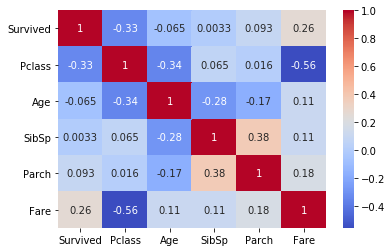

In [67]:
import seaborn as sns

sns.heatmap(df_titanic.corr(), annot=True, cmap="coolwarm");

가장 상관 관계가 높은 feature 는 Fare 이고 Pclass 는 가장 상관관계가 낮은 것으로 나타난다.

## Missing Value 처리

In [68]:
df_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [69]:
df_titanic.shape

(881, 8)

881 개의 data 중 170 개를 drop 시키는 것은 너무 많은 양이므로 Age 는 median 으로 채워주고 Embarked 는 drop 시킨다.

In [70]:
df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
df_titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [71]:
df_titanic.dropna(inplace=True)
df_titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Data 의 skewness  check

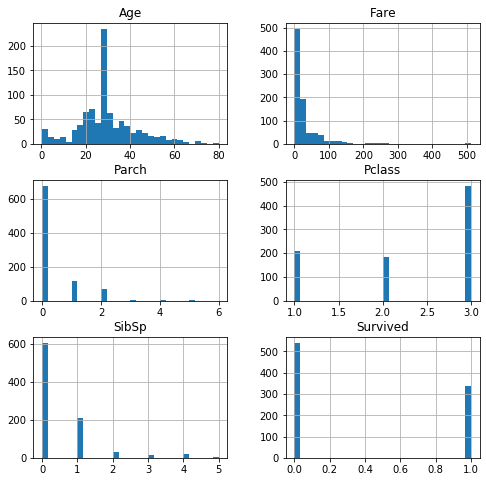

In [72]:
df_titanic.hist(bins=30, figsize=(8, 8));

### Fare 의 분포가 심하게 skew 되어 있으므로 log 값으로 바꾸어 skewness 를 완화 시킨다.

In [73]:
df_titanic['Fare'] = df_titanic['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

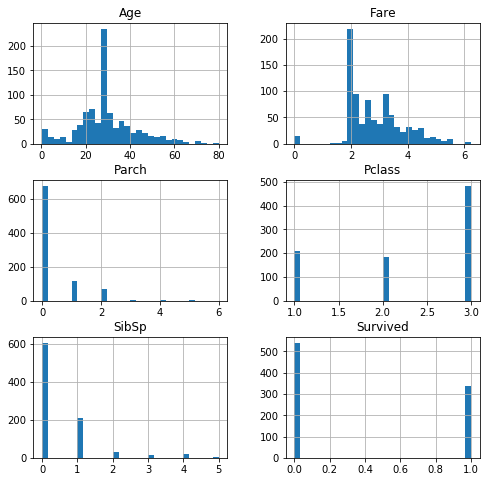

In [74]:
df_titanic.hist(bins=30, figsize=(8, 8));

In [75]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,1.981001,S
1,1,1,female,38.0,1,0,4.266662,C
2,1,3,female,26.0,0,0,2.070022,S
3,1,1,female,35.0,1,0,3.972177,S
4,0,3,male,35.0,0,0,2.085672,S


## Category 변수 처리

Category column 들을 one-hot-encoding 으로 변환한다.

In [76]:
df_titanic = pd.get_dummies(df_titanic)
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,1.981001,0,1,0,0,1
1,1,1,38.0,1,0,4.266662,1,0,1,0,0
2,1,3,26.0,0,0,2.070022,1,0,0,0,1
3,1,1,35.0,1,0,3.972177,1,0,0,0,1
4,0,3,35.0,0,0,2.085672,0,1,0,0,1


In [77]:
df_titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.331124,-0.070252,0.004840,0.094330,0.340387,0.544242,-0.544242,0.168908,0.003237,-0.150161
Pclass,-0.331124,1.000000,-0.341401,0.063365,0.014849,-0.681345,-0.127017,0.127017,-0.247177,0.222579,0.076413
Age,-0.070252,-0.341401,1.000000,-0.283559,-0.170049,0.116162,-0.086289,0.086289,0.030840,-0.031314,-0.007300
SibSp,0.004840,0.063365,-0.283559,1.000000,0.378944,0.301312,0.131243,-0.131243,-0.038638,-0.009820,0.040074
Parch,0.094330,0.014849,-0.170049,0.378944,1.000000,0.312706,0.247753,-0.247753,-0.000586,-0.076366,0.048665
Fare,0.340387,-0.681345,0.116162,0.301312,0.312706,1.000000,0.260482,-0.260482,0.279161,-0.161347,-0.143069
Sex_female,0.544242,-0.127017,-0.086289,0.131243,0.247753,0.260482,1.000000,-1.000000,0.086937,0.076871,-0.124706
Sex_male,-0.544242,0.127017,0.086289,-0.131243,-0.247753,-0.260482,-1.000000,1.000000,-0.086937,-0.076871,0.124706
Embarked_C,0.168908,-0.247177,0.030840,-0.038638,-0.000586,0.279161,0.086937,-0.086937,1.000000,-0.150618,-0.781954
Embarked_Q,0.003237,0.222579,-0.031314,-0.009820,-0.076366,-0.161347,0.076871,-0.076871,-0.150618,1.000000,-0.498448


## Train / Test dataset split

In [78]:
df_titanic.shape

(879, 11)

In [79]:
X_train = df_titanic[:700]
X_test  = df_titanic[700:]

In [80]:
y_train = X_train.pop('Survived')
y_test  = X_test.pop('Survived')

## Standard Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Modeling

- 어떤 algorithm 이 가장 적합한지 알지 못하므로 k-fold cross-validation 을 통하여 algorithm 비교. 일단은 default parameter 를 사용한다.

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

n_fold = 10

In [84]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=300)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='scale')))
models.append(('RMF', RandomForestClassifier(n_estimators=10)))
models.append(('GBM', GradientBoostingClassifier()))

In [85]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=n_fold)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("{}: {:.5f} ({:.5f})".format(name, cv_results.mean(), cv_results.std()))

LR: 0.78857 (0.02195)
KNN: 0.80143 (0.03962)
CART: 0.78000 (0.05540)
SVM: 0.80429 (0.03384)
RMF: 0.78714 (0.05513)
GBM: 0.82429 (0.04474)


## Algorithm Parameter Tunning

- 가장 성능이 좋았던 KNN 과 SVC 및 GBM 에 대하여 GridSearchCV 를 이용하여 parameter tunning 을 한다.

In [86]:
from sklearn.model_selection import GridSearchCV

## Grid Search of KNN

In [87]:
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
print(param_grid)

grid = GridSearchCV(estimator = KNeighborsClassifier(), 
                                param_grid = param_grid, scoring='accuracy', cv=kfold)

grid_result = grid.fit(X_train_scaled, y_train)

print("Best param : {:.5f} using {}".format(grid_result.best_score_, grid_result.best_params_))

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
Best param : 0.81571 using {'n_neighbors': 11}


## Grid Search of SVC

In [88]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C = c_values, kernel = kernel_values)
param_grid

{'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [89]:
grid = GridSearchCV(estimator=SVC(gamma='scale'), 
                                param_grid=param_grid, scoring='accuracy', cv=kfold)

grid_result = grid.fit(X_train_scaled, y_train)

print("Best param : {:.5f} using {}".format(grid_result.best_score_, grid_result.best_params_))

Best param : 0.80571 using {'C': 0.5, 'kernel': 'rbf'}
